In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [48]:
file = "Rakibul_Islam_dataset.csv"
df = pd.read_csv(file, nrows = 220, skiprows=1)
df = df.drop(df.columns[8:], axis=1)

df

,week,analytics,artificial intelligence,big data,data mining,data science,machine learning,python
0,21/12/2014,63,23,53,68,11,14,29
1,28/12/2014,59,22,54,60,13,13,28
2,04/01/2015,90,28,76,88,18,18,35
3,11/01/2015,94,33,76,88,20,21,37
4,18/01/2015,93,33,78,91,19,19,38
...,...,...,...,...,...,...,...,...
215,03/02/2019,65,76,79,63,79,89,81
216,10/02/2019,66,82,83,70,78,88,86
217,17/02/2019,65,80,80,68,80,90,85
218,24/02/2019,64,75,79,74,77,86,85


In [49]:
df.week = pd.to_datetime(df.week, format='%d/%m/%Y')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   week                     220 non-null    datetime64[ns]
 1   analytics                220 non-null    int64         
 2   artificial intelligence  220 non-null    int64         
 3   big data                 220 non-null    int64         
 4   data mining              220 non-null    int64         
 5   data science             220 non-null    int64         
 6   machine learning         220 non-null    int64         
 7   python                   220 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 13.9 KB


In [51]:
df.dtypes

week                       datetime64[ns]
analytics                           int64
artificial intelligence             int64
big data                            int64
data mining                         int64
data science                        int64
machine learning                    int64
python                              int64
dtype: object

In [52]:
# Here we set the sizes of the figures, so all figures have the same size
sns.set(rc={'figure.figsize':(16, 4)})

#### 1.5.1 Simple line plot with one variable

In [53]:
# x= df.week
# y= df['python']
# plt.plot(x,y)

# #Change x/y-label
# plt.xlabel('Time')
# plt.ylabel('search / week')

# #Change title
# plt.title('Python search result for week', fontsize=(15))

#### 1.5.2 Line plot with moving average

Text(0.5, 1.0, 'Python search result for week')

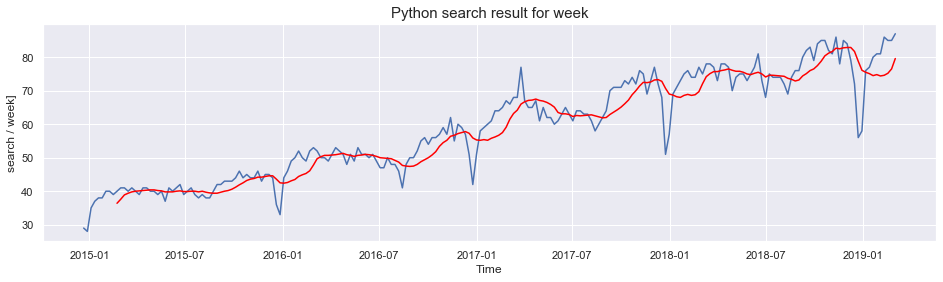

In [54]:
#Assign variables
x= df.week
y= df.python

#Apply moving average
moving_avg = y.rolling(10).mean()

#For every line you want to display, a single plot command is necessary
plt.plot(x, y)
plt.plot(x, moving_avg, color = 'red')

#Change labels and title
plt.xlabel('Time')
plt.ylabel('search / week]')
plt.title('Python search result for week', fontsize=(15))

#### 1.5.3 Line plot of two variables with markers

Text(0.5, 1.0, 'Search result of python and analytics per week')

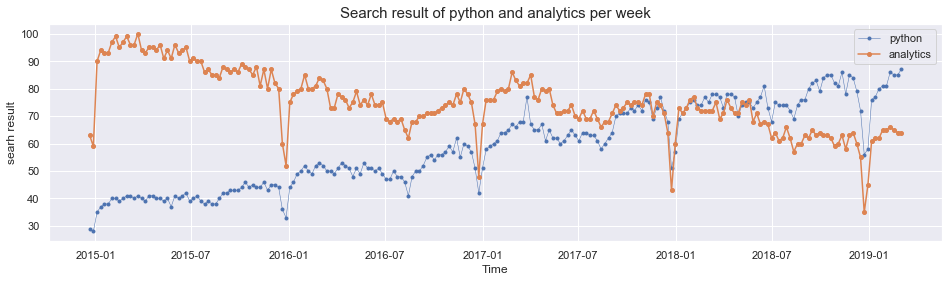

In [55]:
#Here we use the 
fig, ax = plt.subplots()

#As we have defined only one axis (ax) everything is plotted on this axis. 
ax.plot(df.week, df.python, marker='.', linestyle='-', linewidth=0.5, label='python')

ax.plot(df.week, df.analytics, marker='o', markersize=4, linestyle='-', label='analytics')

#In the end we give the command to plot, the way we set our conditions.
ax.plot()

#We insert a legend 
ax.legend()

#Labels and title
plt.xlabel('Time')
plt.ylabel('searh result')
plt.title('Search result of python and analytics per week', fontsize=(15))

#### 1.5.4 Plot with two variables and running mean

Text(0.5, 1.0, 'Search result of python and big data and analytics')

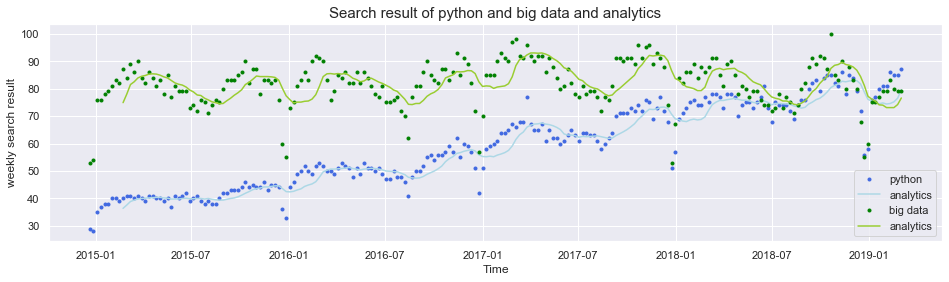

In [56]:
# Now we want to display the differences in search result variables using the variables and applying the rolling mean
moving_average= df['big data'].rolling(10).mean() # rolling mean to nullify the null values in between two variables
moving_average2= df['python'].rolling(10).mean()

#Definition of the subplots
fig, ax = plt.subplots()

#Accumulation at Polar station
ax.plot(df['week'], df['python'], marker='.', markersize=6, color='royalblue',linestyle='None', label='python')
ax.plot(df['week'], moving_average2, linewidth=1.5, color='lightblue', label='analytics')

#Accumulation at Camp
ax.plot(df['week'], df['big data'], marker='.', markersize=6, color='green', linestyle='None', label='big data')
ax.plot(df['week'], moving_average, linewidth=1.5, color='yellowgreen', label='analytics')

#Set legend, labels and title
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('weekly search result')
ax.set_title('Search result of python and big data and analytics', fontsize=(15))

#### 1.5.5 Plot with 3 variables subplotted

In [57]:
sns.set(rc={'figure.figsize':(20, 30)})

Text(0, 0.5, 'search / week')

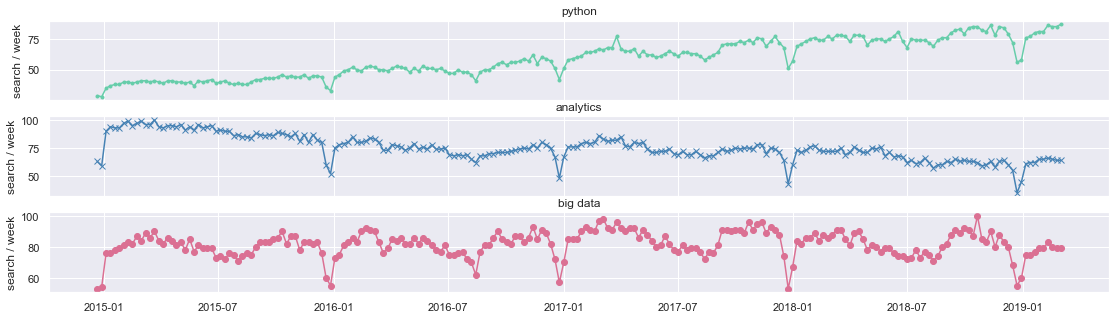

In [58]:
#Assigning the variables
x=df.week
y1=df.python
y2=df.analytics
y3=df['big data']

#Now we use 3 axes (ax, ax1, ax2) and we define the settings for the axes block by block
fig, (ax, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(19,5))

#Change color, linestyle, linewidth, markerstyle and transparency (alpha)
ax.plot(x, y1, color='mediumaquamarine', marker='.', alpha=1, linestyle='-')
#Change title and fontsize
ax.set_title('python', fontsize=(12))
ax.set_ylabel('search / week')

#Second plot
ax1.plot(x, y2, color='steelblue', marker='x', alpha=1, linestyle='-')
ax1.set_title('analytics', fontsize=(12))
ax1.set_ylabel('search / week')

#Third plot
ax2.plot(x, y3, color='palevioletred', marker='o', alpha=1, linestyle='-')
ax2.set_title('big data', fontsize=(12))
ax2.set_ylabel('search / week')